In [1]:
import tensorflow as tf
from keras.layers import Input, Lambda, Dense, Flatten,GlobalAveragePooling2D,BatchNormalization,Dropout,Activation
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

**Context**

I found this dataset when it was not uploaded on Kaggle and was scattered across the internet. This dataset is a collection of multiple data sets I found online. The size of this dataset is ~ 7 GB due to the high resolution of images. The number of images in the dataset is
3355 .jpg files.

**Content**

The dataset has been divided into two groups, train and validation.
Inside the two folders are 4 categories of types:

BrownSpot
Healthy
Hispa
LeafBlast

Note: The image resolution in the images is not uniform.

Possible Datasets that can be used alongside

Rice Leaf Disease Dataset by Marsh

Rice Image Dataset by Huy Minh Do

Plant Pathology2020

**Resources**

UCI - Rice Disease

In [2]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/riceleafs/RiceLeafs/validation/Hispa/IMG_20190419_103319.jpg
/kaggle/input/riceleafs/RiceLeafs/validation/Hispa/IMG_20190419_114834.jpg
/kaggle/input/riceleafs/RiceLeafs/validation/Hispa/IMG_20190419_095915.jpg
/kaggle/input/riceleafs/RiceLeafs/validation/Hispa/IMG_20190419_094254.jpg
/kaggle/input/riceleafs/RiceLeafs/validation/Hispa/IMG_20190419_095010.jpg
/kaggle/input/riceleafs/RiceLeafs/validation/Hispa/IMG_20190419_095315.jpg
/kaggle/input/riceleafs/RiceLeafs/validation/Hispa/IMG_20190419_105736.jpg
/kaggle/input/riceleafs/RiceLeafs/validation/Hispa/IMG_20190419_130343.jpg
/kaggle/input/riceleafs/RiceLeafs/validation/Hispa/IMG_20190419_095920.jpg
/kaggle/input/riceleafs/RiceLeafs/validation/Hispa/IMG_20190419_124708.jpg
/kaggle/input/riceleafs/RiceLeafs/validation/Hispa/IMG_20190419_100047.jpg
/kaggle/input/riceleafs/RiceLeafs/validation/Hispa/IMG_20190419_115028.jpg
/kaggle/input/riceleafs/RiceLeafs/validation/Hispa/IMG_20190419_110512.jpg
/kaggle/input/riceleafs/R

In [3]:
train_dir = '../input/riceleafs/RiceLeafs/train'
test_dir = '../input/riceleafs/RiceLeafs/validation'

In [4]:
classes=[]
for file in os.listdir(train_dir):
    classes+=[file]
print(classes)
print(len(classes))

['Hispa', 'Healthy', 'BrownSpot', 'LeafBlast']
4


In [5]:
brownspot = [train_dir + '/BrownSpot/' + img for img in os.listdir(train_dir + '/BrownSpot')[:9]]
healthy = [train_dir  + '/Healthy/' + img for img in os.listdir(train_dir + '/Healthy')[:9]]
hispa = [train_dir  + '/Hispa/' + img for img in os.listdir(train_dir + '/Hispa')[:9]]
leafblast = [train_dir  + '/LeafBlast/' + img for img in os.listdir(train_dir + '/LeafBlast')[:9]]

**BROWN SPOT LEAFS**

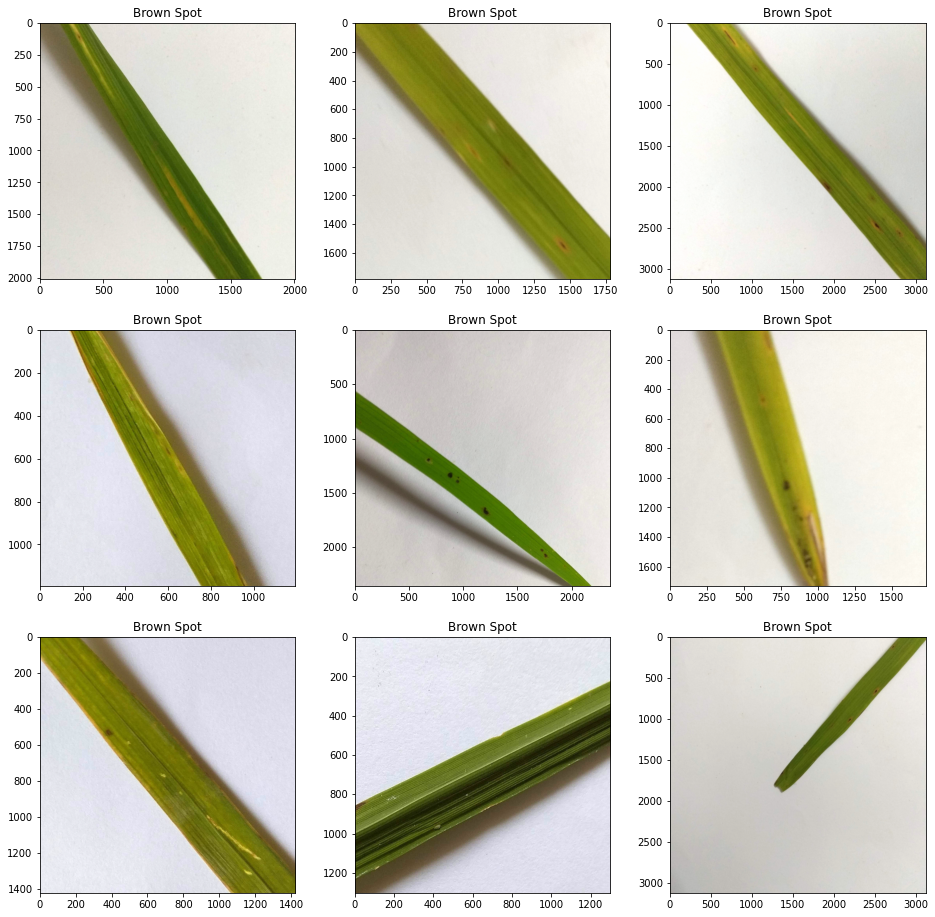

In [6]:
from PIL import Image
plt.figure(figsize=(16,16))
for i,k  in enumerate(brownspot):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Brown Spot")

**HISPA LEAFS**

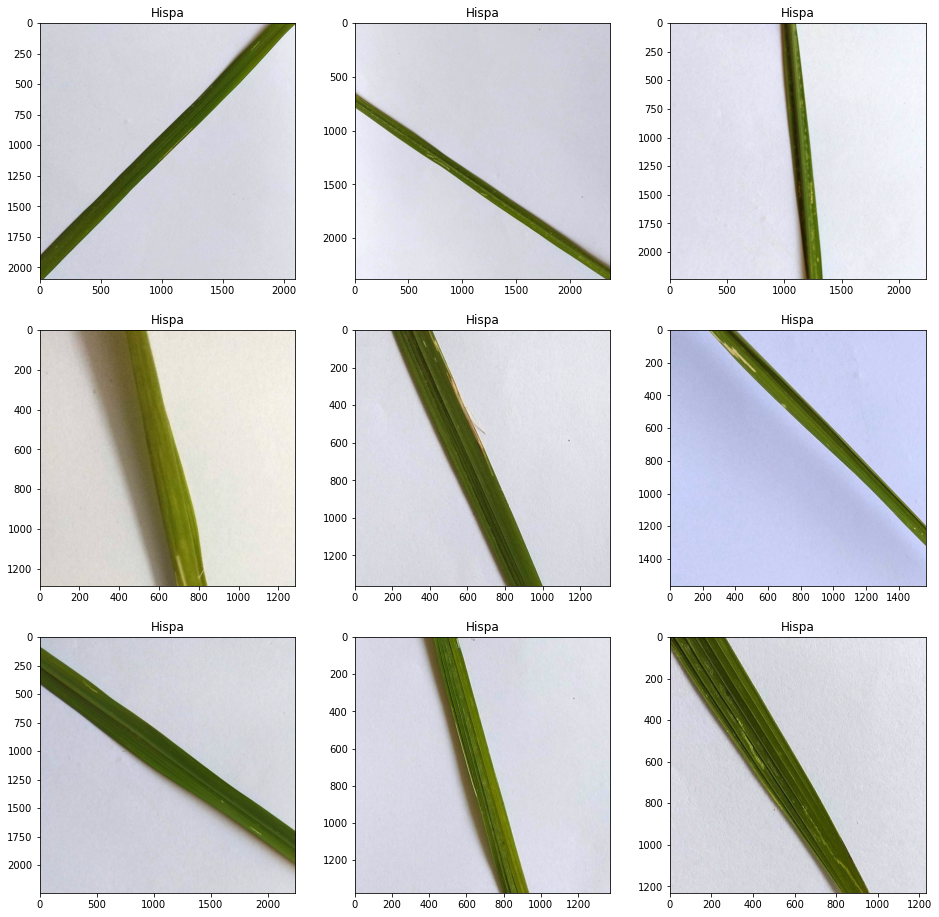

In [7]:
plt.figure(figsize=(16,16))
for i,k  in enumerate(hispa):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Hispa")

**LEAF BLAST LEAF**

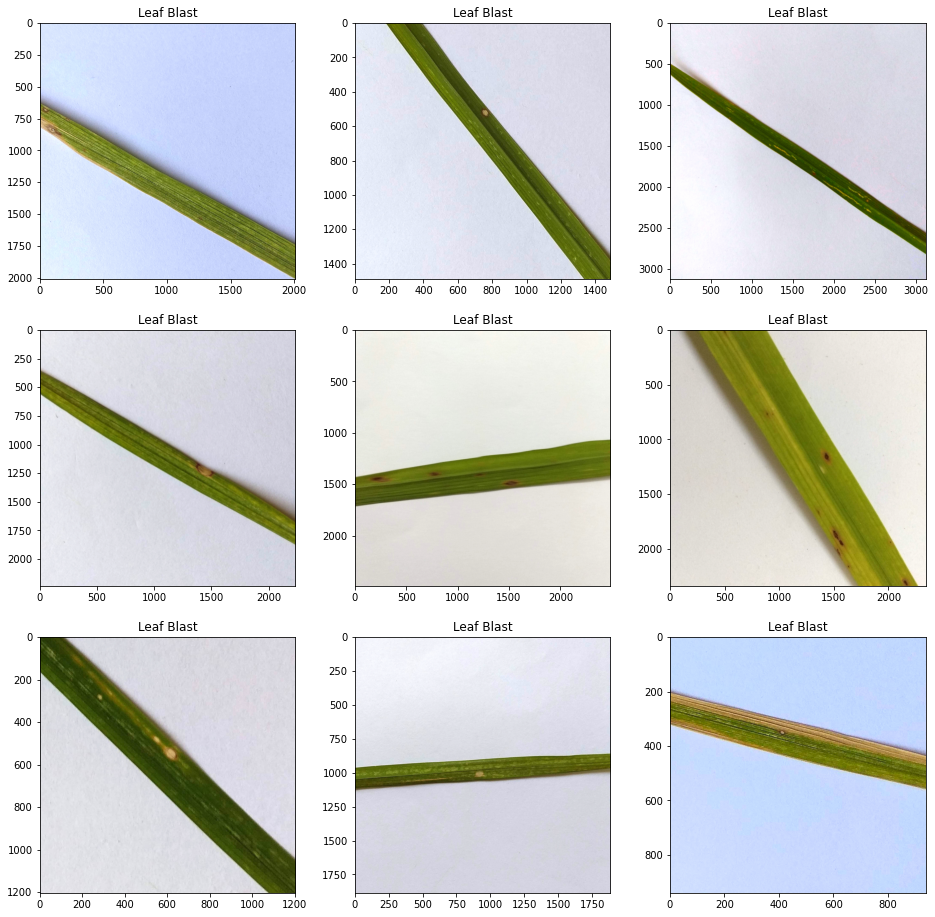

In [8]:
plt.figure(figsize=(16,16))
for i,k  in enumerate(leafblast):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Leaf Blast")

**HEALTHY LEAFS**

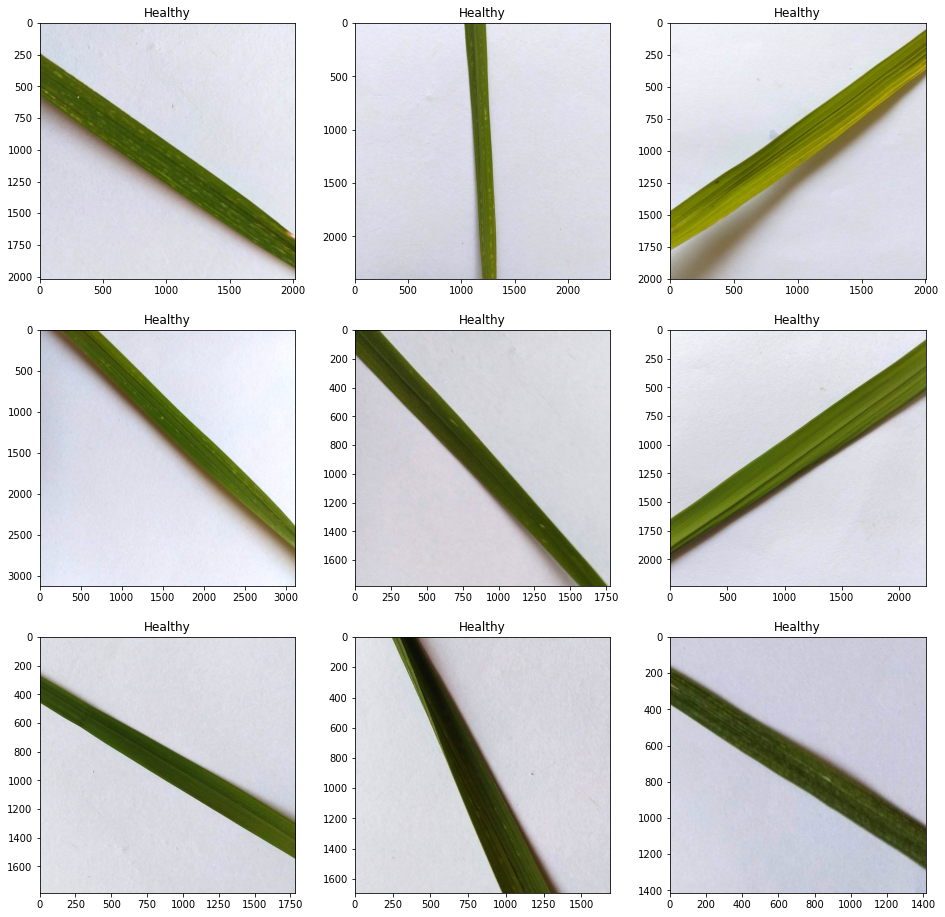

In [9]:
plt.figure(figsize=(16,16))
for i,k  in enumerate(healthy):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Healthy")

**PREPROCESSING THE TRAIN DATASET**

In [10]:
dataset=[]
shape=(224,224)
count=0
for file in os.listdir(train_dir):
    path=os.path.join(train_dir,file)
    t=0
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=shape)
        image=img_to_array(image)
        image=image/255.0
        dataset+=[[image,count]]
        t+=1
    count=count+1

**PREPROCESSING THE TEST DATASET**

In [11]:
testset=[]
count=0
for file in os.listdir(test_dir):
    path=os.path.join(test_dir,file)
    t=0
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=shape)
        image=img_to_array(image)
        image=image/255.0
        testset+=[[image,count]]
        t+=1
    count=count+1

In [12]:
data,trainlabels = zip(*dataset)
test,testlabels = zip(*testset)

In [13]:
labels1=to_categorical(trainlabels)
labels=np.array(labels1)

In [14]:
data=np.array(data)
test=np.array(test)

In [15]:
trainx,testx,trainy,testy=train_test_split(data,labels,test_size=0.2,random_state=42)

In [16]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(2147, 224, 224, 3)
(537, 224, 224, 3)
(2147, 4)
(537, 4)


**DATA AUGMENTATION**

In [17]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=30,zoom_range=0.2,
                        width_shift_range=0.1,height_shift_range=0.2,shear_range=0.2)

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (224,224,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256,activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(4,activation = 'softmax')

],    name = 'Conv2D_Model')

model.summary()

Model: "Conv2D_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 43264)            

In [19]:
LEARNING_RATE = 0.001 #@param {type:"number"}

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

**FITTING THE MODEL**

In [20]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=10)

Epoch 1/10
68/68 [==============================] - 49s 705ms/step - loss: 1.4443 - accuracy: 0.3907 - val_loss: 1.2893 - val_accuracy: 0.4469
Epoch 2/10
68/68 [==============================] - 48s 695ms/step - loss: 1.2753 - accuracy: 0.4481 - val_loss: 1.2220 - val_accuracy: 0.4972
Epoch 3/10
68/68 [==============================] - 48s 696ms/step - loss: 1.1827 - accuracy: 0.4660 - val_loss: 1.1735 - val_accuracy: 0.4693
Epoch 4/10
68/68 [==============================] - 48s 700ms/step - loss: 1.1327 - accuracy: 0.5254 - val_loss: 0.9384 - val_accuracy: 0.6294
Epoch 5/10
68/68 [==============================] - 49s 723ms/step - loss: 1.0252 - accuracy: 0.5953 - val_loss: 0.9245 - val_accuracy: 0.6462
Epoch 6/10
68/68 [==============================] - 47s 692ms/step - loss: 1.0123 - accuracy: 0.5964 - val_loss: 0.8980 - val_accuracy: 0.6480
Epoch 7/10
68/68 [==============================] - 47s 694ms/step - loss: 0.9960 - accuracy: 0.6143 - val_loss: 0.9321 - val_accuracy: 0.6164

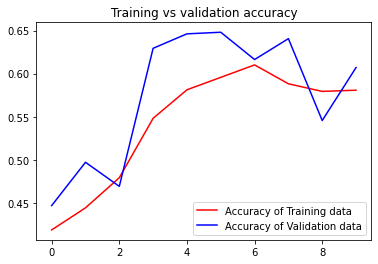

<Figure size 432x288 with 0 Axes>

In [21]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

**Inference :- We can use pretrained model here to further improve the accuracy and loss.**

In [31]:
score = model.evaluate(testx, testy, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9451329112052917
Test accuracy: 0.6070763468742371


##saving the model:

In [29]:
from keras.models import load_model

model.save('riceleafdisease_model.h5')

In [33]:
# Saving the model for Future Inferences

model_json = model.to_json()
with open("riceleafdisease_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("riceleafdisease-model.h5")